# Stellar Mass Completeness Limits
 using the method described in Pozzetti et al. (2010)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table, join



In [2]:
home_dir = os.path.expanduser('~')
directory_SN_X3 = "/home/astro/manasoi7/Master_Thesis/Results/SN-X3"
directory_SN_C3 = "/home/astro/manasoi7/Master_Thesis/Results/SN-C3"
directory_SN_E2 = "/home/astro/manasoi7/Master_Thesis/Results/SN-E2" 
directory_COSMOS = "/home/astro/manasoi7/Master_Thesis/Results/COSMOS" 
res = os.path.join(home_dir, 'Master_Thesis', 'Results')

In [8]:

home_dir = os.path.expanduser('~')
thesis_path = os.path.join(home_dir, 'Master_Thesis', 'DATA')



# Catalog
fits_file_path = os.path.join(thesis_path, "Y3_deep_fields_DB_wKNN_cat_SN-C3_zm.fits")  
t= Table.read(fits_file_path)
masked = os.path.join(thesis_path, "SN-C3_masked_cat.fits")  
t3= Table.read(masked)

# Join in one table
t=join(t,t3,keys='id') 
t.rename_column('ra_1','ra')
t.rename_column('dec_1','dec')
t


id,ra,dec,fof_id_1,fof_size_1,mask_flags_1,flags_1,flagstr_1,badpix_frac_1,psf_g_0_1,psf_g_1_1,psf_T_1,bdf_T_1,bdf_T_err_1,bdf_T_ratio_1,bdf_g_0_1,bdf_g_1_1,bdf_fracdev_1,bdf_fracdev_err_1,tilename_1,EBV_SFD98_1,mask_flags_nir_1,flags_nir_1,flagstr_nir_1,badpix_frac_nir_1,psf_flux_u_1,psf_flux_g_1,psf_flux_r_1,psf_flux_i_1,psf_flux_z_1,psf_flux_J_1,psf_flux_H_1,psf_flux_Ks_1,psf_flux_err_u_1,psf_flux_err_g_1,psf_flux_err_r_1,psf_flux_err_i_1,psf_flux_err_z_1,psf_flux_err_J_1,psf_flux_err_H_1,psf_flux_err_Ks_1,bdf_flux_u_1,bdf_flux_g_1,bdf_flux_r_1,bdf_flux_i_1,bdf_flux_z_1,bdf_flux_J_1,bdf_flux_H_1,bdf_flux_Ks_1,bdf_flux_err_u_1,bdf_flux_err_g_1,bdf_flux_err_r_1,bdf_flux_err_i_1,bdf_flux_err_z_1,bdf_flux_err_J_1,bdf_flux_err_H_1,bdf_flux_err_Ks_1,gap_flux_u_1,gap_flux_g_1,gap_flux_r_1,gap_flux_i_1,gap_flux_z_1,gap_flux_J_1,gap_flux_H_1,gap_flux_Ks_1,gap_flux_err_u_1,gap_flux_err_g_1,gap_flux_err_r_1,gap_flux_err_i_1,gap_flux_err_z_1,gap_flux_err_J_1,gap_flux_err_H_1,gap_flux_err_Ks_1,psf_flux_calib_u_1,psf_flux_calib_g_1,psf_flux_calib_r_1,psf_flux_calib_i_1,psf_flux_calib_z_1,psf_flux_calib_J_1,psf_flux_calib_H_1,psf_flux_calib_Ks_1,psf_flux_err_calib_u_1,psf_flux_err_calib_g_1,psf_flux_err_calib_r_1,psf_flux_err_calib_i_1,psf_flux_err_calib_z_1,psf_flux_err_calib_J_1,psf_flux_err_calib_H_1,psf_flux_err_calib_Ks_1,bdf_flux_calib_u_1,bdf_flux_calib_g_1,bdf_flux_calib_r_1,bdf_flux_calib_i_1,bdf_flux_calib_z_1,bdf_flux_calib_J_1,bdf_flux_calib_H_1,bdf_flux_calib_Ks_1,bdf_flux_err_calib_u_1,bdf_flux_err_calib_g_1,bdf_flux_err_calib_r_1,bdf_flux_err_calib_i_1,bdf_flux_err_calib_z_1,bdf_flux_err_calib_J_1,bdf_flux_err_calib_H_1,bdf_flux_err_calib_Ks_1,psf_flux_dered_u_1,psf_flux_dered_g_1,psf_flux_dered_r_1,psf_flux_dered_i_1,psf_flux_dered_z_1,psf_flux_dered_J_1,psf_flux_dered_H_1,psf_flux_dered_Ks_1,psf_flux_err_dered_u_1,psf_flux_err_dered_g_1,psf_flux_err_dered_r_1,psf_flux_err_dered_i_1,psf_flux_err_dered_z_1,psf_flux_err_dered_J_1,psf_flux_err_dered_H_1,psf_flux_err_dered_Ks_1,bdf_flux_dered_u_1,bdf_flux_dered_g_1,bdf_flux_dered_r_1,bdf_flux_dered_i_1,bdf_flux_dered_z_1,bdf_flux_dered_J_1,bdf_flux_dered_H_1,bdf_flux_dered_Ks_1,bdf_flux_err_dered_u_1,bdf_flux_err_dered_g_1,bdf_flux_err_dered_r_1,bdf_flux_err_dered_i_1,bdf_flux_err_dered_z_1,bdf_flux_err_dered_J_1,bdf_flux_err_dered_H_1,bdf_flux_err_dered_Ks_1,psf_flux_dered_calib_u_1,psf_flux_dered_calib_g_1,psf_flux_dered_calib_r_1,psf_flux_dered_calib_i_1,psf_flux_dered_calib_z_1,psf_flux_dered_calib_J_1,psf_flux_dered_calib_H_1,psf_flux_dered_calib_Ks_1,psf_flux_err_dered_calib_u_1,psf_flux_err_dered_calib_g_1,psf_flux_err_dered_calib_r_1,psf_flux_err_dered_calib_i_1,psf_flux_err_dered_calib_z_1,psf_flux_err_dered_calib_J_1,psf_flux_err_dered_calib_H_1,psf_flux_err_dered_calib_Ks_1,bdf_flux_dered_calib_u_1,bdf_flux_dered_calib_g_1,bdf_flux_dered_calib_r_1,bdf_flux_dered_calib_i_1,bdf_flux_dered_calib_z_1,bdf_flux_dered_calib_J_1,bdf_flux_dered_calib_H_1,bdf_flux_dered_calib_Ks_1,bdf_flux_err_dered_calib_u_1,bdf_flux_err_dered_calib_g_1,bdf_flux_err_dered_calib_r_1,bdf_flux_err_dered_calib_i_1,bdf_flux_err_dered_calib_z_1,bdf_flux_err_dered_calib_J_1,bdf_flux_err_dered_calib_H_1,bdf_flux_err_dered_calib_Ks_1,psf_mag_u_1,psf_mag_g_1,psf_mag_r_1,psf_mag_i_1,psf_mag_z_1,psf_mag_J_1,psf_mag_H_1,psf_mag_Ks_1,psf_mag_dered_u_1,psf_mag_dered_g_1,psf_mag_dered_r_1,psf_mag_dered_i_1,psf_mag_dered_z_1,psf_mag_dered_J_1,psf_mag_dered_H_1,psf_mag_dered_Ks_1,psf_mag_err_dered_u_1,psf_mag_err_dered_g_1,psf_mag_err_dered_r_1,psf_mag_err_dered_i_1,psf_mag_err_dered_z_1,psf_mag_err_dered_J_1,psf_mag_err_dered_H_1,psf_mag_err_dered_Ks_1,psf_mag_dered_calib_u_1,psf_mag_dered_calib_g_1,psf_mag_dered_calib_r_1,psf_mag_dered_calib_i_1,psf_mag_dered_calib_z_1,psf_mag_dered_calib_J_1,psf_mag_dered_calib_H_1,psf_mag_dered_calib_Ks_1,bdf_mag_u_1,bdf_mag_g_1,bdf_mag_r_1,bdf_mag_i_1,bdf_mag_z_1,bdf_mag_J_1,bdf_mag_H_1,bdf_mag_Ks_1,bdf_mag_dered_u_1,bdf_mag_dered_g_1,bdf_mag_dered_r_1,bdf_mag_dered_i_1,

In [4]:
matching_cols = [col for col in t.colnames if 'bdf_mag' in col.lower()]
if matching_cols:
    for col in matching_cols:
        print(f"  🔹 {col}")

  🔹 bdf_mag_u_1
  🔹 bdf_mag_g_1
  🔹 bdf_mag_r_1
  🔹 bdf_mag_i_1
  🔹 bdf_mag_z_1
  🔹 bdf_mag_J_1
  🔹 bdf_mag_H_1
  🔹 bdf_mag_Ks_1
  🔹 bdf_mag_dered_u_1
  🔹 bdf_mag_dered_g_1
  🔹 bdf_mag_dered_r_1
  🔹 bdf_mag_dered_i_1
  🔹 bdf_mag_dered_z_1
  🔹 bdf_mag_dered_J_1
  🔹 bdf_mag_dered_H_1
  🔹 bdf_mag_dered_Ks_1
  🔹 bdf_mag_err_dered_u_1
  🔹 bdf_mag_err_dered_g_1
  🔹 bdf_mag_err_dered_r_1
  🔹 bdf_mag_err_dered_i_1
  🔹 bdf_mag_err_dered_z_1
  🔹 bdf_mag_err_dered_J_1
  🔹 bdf_mag_err_dered_H_1
  🔹 bdf_mag_err_dered_Ks_1
  🔹 bdf_mag_dered_calib_u_1
  🔹 bdf_mag_dered_calib_g_1
  🔹 bdf_mag_dered_calib_r_1
  🔹 bdf_mag_dered_calib_i_1
  🔹 bdf_mag_dered_calib_z_1
  🔹 bdf_mag_dered_calib_J_1
  🔹 bdf_mag_dered_calib_H_1
  🔹 bdf_mag_dered_calib_Ks_1
  🔹 bdf_mag_u_2
  🔹 bdf_mag_g_2
  🔹 bdf_mag_r_2
  🔹 bdf_mag_i_2
  🔹 bdf_mag_z_2
  🔹 bdf_mag_J_2
  🔹 bdf_mag_H_2
  🔹 bdf_mag_Ks_2
  🔹 bdf_mag_dered_u_2
  🔹 bdf_mag_dered_g_2
  🔹 bdf_mag_dered_r_2
  🔹 bdf_mag_dered_i_2
  🔹 bdf_mag_dered_z_2
  🔹 bdf_mag_dered_J_2

In [5]:

def compute_mass_limit(df, mag_limit, z_bins, faint_fraction=0.2, percentile=95):
    z_centers = []
    mass_limits = []
    for zmin, zmax in zip(z_bins[:-1], z_bins[1:]):
        bin_df = df[(df['z'] >= zmin) & (df['z'] < zmax)]
        if len(bin_df) < 10:
            mass_limits.append(np.nan)
            z_centers.append((zmin + zmax) / 2)
            continue
        # Compute Mlim
        mlim = bin_df['logM'] + 0.4 * (bin_df['mag'] - mag_limit)
        faintest = bin_df.nlargest(int(faint_fraction * len(bin_df)), 'mag')
        faint_mlim = faintest['logM'] + 0.4 * (faintest['mag'] - mag_limit)
        limit = np.percentile(faint_mlim, percentile)
        z_centers.append((zmin + zmax) / 2)
        mass_limits.append(limit)
    return np.array(z_centers), np.array(mass_limits)

In [23]:
home_dir = os.path.expanduser('~')
thesis_path = os.path.join(home_dir, 'Master_Thesis', 'DATA')

fields = {
    "SN-X3": {
        "catalog": "Y3_deep_fields_DB_wKNN_cat_SN-X3_zm.fits",
        "masked": "SN-X3_masked_cat.fits",
        "randoms": "SN-X3_randoms_ugriz_trim_video.fits"
    },
    "SN-C3": {
        "catalog": "Y3_deep_fields_DB_wKNN_cat_SN-C3_zm.fits",
        "masked": "SN-C3_masked_cat.fits",
        "randoms": "SN-C3_randoms_ugriz_trim_video.fits"
    },
    "SN-E2": {
        "catalog": "Y3_deep_fields_DB_wKNN_cat_SN-E2_zm.fits",
        "masked": "SN-E2_masked_cat.fits",
        "randoms": "SN-E2_randoms_ugriz_trim_video.fits"
    },
    "COSMOS": {
        "catalog": "Y3_deep_fields_DB_wKNN_cat_COSMOS_zm.fits",
        "masked": "COSMOS_masked_cat.fits",
        "randoms": "COSMOS_randoms_ugriz_trim_video.fits"
    }
}

z_min, z_max = 0, 1.7
SM_bins = [(8.5, 12.5)]
mag_limit = 25.0  # i-band magnitude limit
z_bins = np.arange(z_min, z_max + 0.01, 0.1)


all_data = []

for field_name, paths in fields.items():
    print(f"Reading {field_name}...")
    catalog = Table.read(os.path.join(thesis_path, paths["catalog"]))
    masked = Table.read(os.path.join(thesis_path, paths["masked"]))
    catalog = join(catalog, masked, keys='id')
    catalog.rename_columns(['ra_1', 'dec_1'], ['ra', 'dec'])
    
    df = catalog.to_pandas()
    df = df.rename(columns={
        'SM': 'logM',
        'bdf_mag_dered_calib_i_1': 'mag',
        'z': 'z'
    })
    df = df[['z', 'logM', 'mag']].dropna()
    
    # Filter redshift and mass bin
    df = df[(df['z'] >= z_min) & (df['z'] <= z_max)]
    
    for sm_min, sm_max in SM_bins:
        df_bin = df[(df['logM'] >= sm_min) & (df['logM'] < sm_max)]
        if len(df_bin) == 0:
            continue
        zc, ml = compute_mass_limit(df_bin, mag_limit, z_bins)
        all_data.append((field_name, zc, ml))



Reading SN-X3...
Reading SN-C3...
Reading SN-E2...
Reading COSMOS...


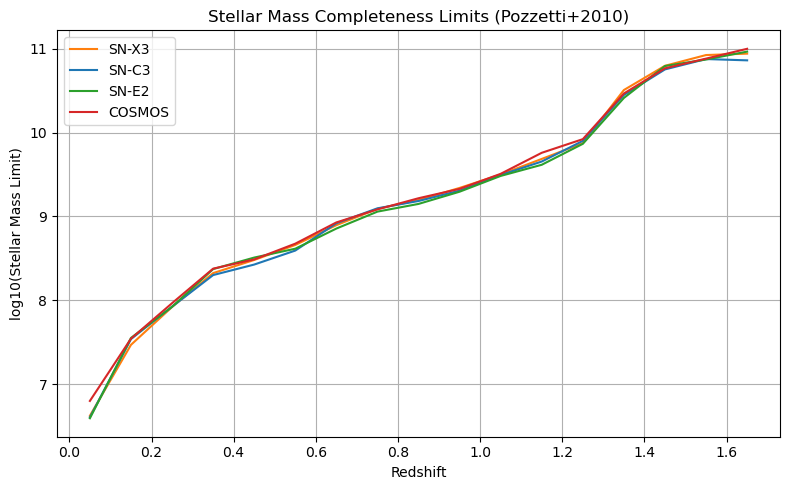

In [29]:
colors = {
    "SN-C3": "tab:blue",
    "SN-X3": "tab:orange",
    "COSMOS": "tab:red",
    "SN-E2": "tab:green"
}

plt.figure(figsize=(8, 5))
for field_name, zc, ml in all_data:
    plt.plot(zc, ml,label=field_name, color=colors[field_name])


plt.xlabel("Redshift")
plt.ylabel("log10(Stellar Mass Limit)")
plt.title("Stellar Mass Completeness Limits (Pozzetti+2010)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


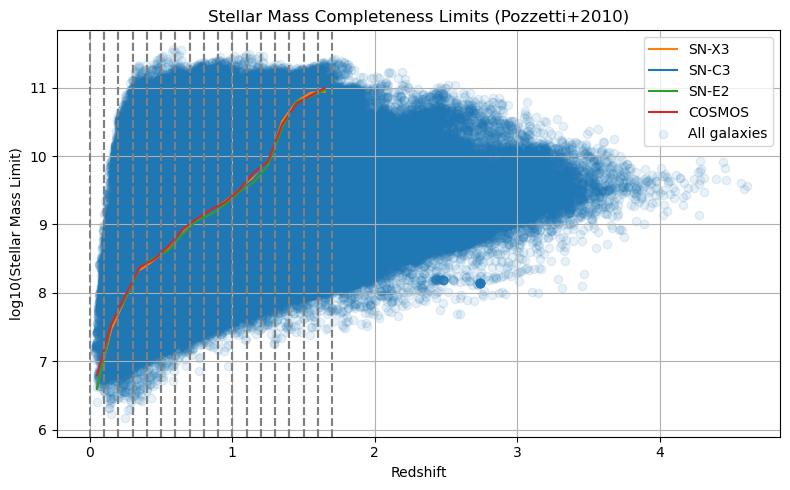

In [30]:
colors = {
    "SN-C3": "tab:blue",
    "SN-X3": "tab:orange",
    "COSMOS": "tab:red",
    "SN-E2": "tab:green"
}
plt.figure(figsize=(8, 5))
for field_name, zc, ml in all_data:
    plt.plot(zc, ml,label=field_name, color=colors[field_name])
    
for i in range(len(z_bins) - 1):
    z_min = z_bins[i]
    z_max = z_bins[i + 1]
    plt.axvline(z_min, linestyle='--', color='gray')
    plt.axvline(z_max, linestyle='--', color='gray')
    
plt.scatter(t['z'], t['SM'], label='All galaxies',alpha=0.1) # SN-C3

plt.xlabel("Redshift")
plt.ylabel("log10(Stellar Mass Limit)")
plt.title("Stellar Mass Completeness Limits (Pozzetti+2010)")
plt.savefig("SM_Completeness_Limits.png")

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_1372849/2409313555.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/astro/manasoi7/.conda/envs/project/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


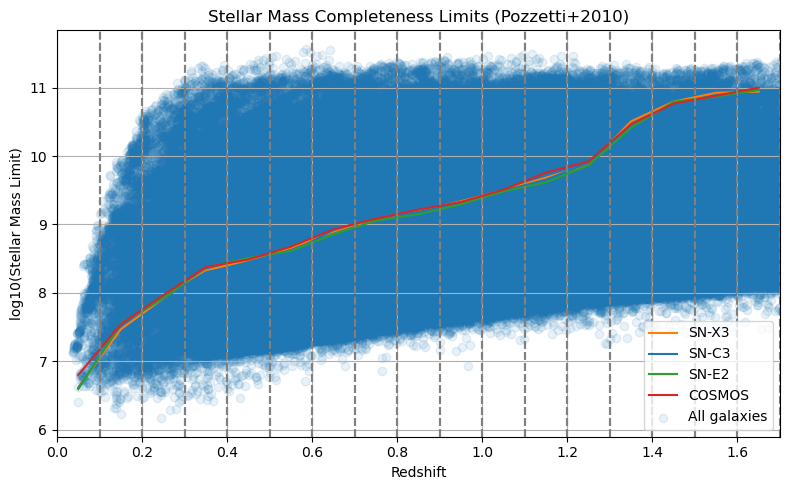

In [31]:
colors = {
    "SN-C3": "tab:blue",
    "SN-X3": "tab:orange",
    "COSMOS": "tab:red",
    "SN-E2": "tab:green"
}
plt.figure(figsize=(8, 5))
for field_name, zc, ml in all_data:
    plt.plot(zc, ml,label=field_name, color=colors[field_name])
    
for i in range(len(z_bins) - 1):
    z_min = z_bins[i]
    z_max = z_bins[i + 1]
    plt.axvline(z_min, linestyle='--', color='gray')
    plt.axvline(z_max, linestyle='--', color='gray')
    
plt.scatter(t['z'], t['SM'], label='All galaxies',alpha=0.1) # SN-C3

plt.xlim(0,1.7)

plt.xlabel("Redshift")
plt.ylabel("log10(Mass Completeness Limit) [M☉]")
plt.title("Stellar Mass Completeness Limits (Pozzetti+2010)")
#plt.title(f"Stellar Mass Completeness Limits ({percentile}th percentile of faintest {int(faint_fraction*100)}%)")

plt.savefig("SM_Completeness_Limits.png")

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
